In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

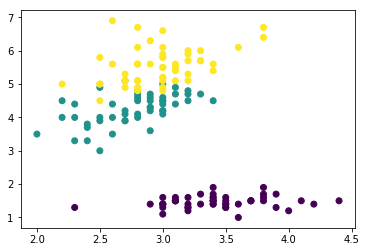

In [6]:
from sklearn import datasets


iris = datasets.load_iris()

X = iris.data[:, 1:3]  # we only take the first two features.
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [7]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

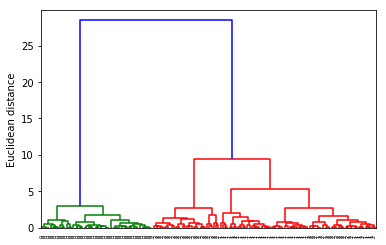

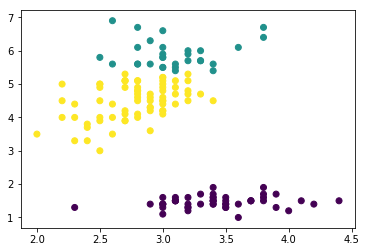

In [32]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='ward') 
row_dendr = dendrogram(row_clusters, labels=y)

plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()


Pokazuje jak jest hiearchia klastrów. Na osi pionowej jest zaznaczona odległość klastrów. Możemy zobaczyć jaka jest odległość łączonych klastrów w poszczególnych iteracjach. 

Zauważmy, że każdy klaster jest podzbiorem innego (mamy strukturę drzewa binarnego). Dla dużej ilości danych ciężko jest zobaczyć co jest z czym połączone. Możemy obciąć dendrogram.

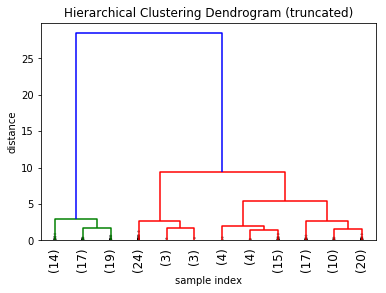

In [12]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    row_clusters,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Klastrowanie możemy obciąć na podstawie odległości między klastrami (klastry są przynajmniej w takiej odległości):

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

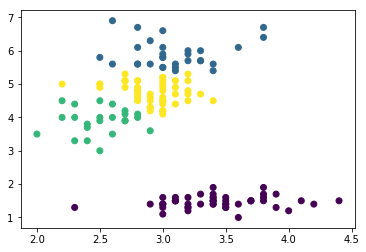

In [22]:
max_d = 5
part = fcluster(row_clusters, max_d, criterion='distance')

plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()

# ELBOW method

Jaka ilość klastrów jest właściwa? W hierarchicznym klastrowaniu chcemy zbudować hierarchię klastrów, więc możemy patrzeć zarówno na konkretną ilość jak i na powiązania pomiędzy klastrami. Możemy użyć znanej metody ELBOW do wyznaczenia konkretnej ilości (błąd SSE zastępujemy odległością klastrów).

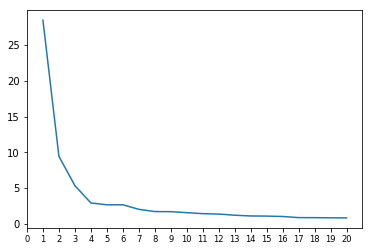

In [30]:
n = 20
t=range(0,n+1)
last = row_clusters[-n:, 2] #last ten merges (clustering into 1 to 10 groups)
last_rev = last[::-1] #reverse ordr
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)
plt.xticks(range(len(t)), t, size='small')
plt.show()


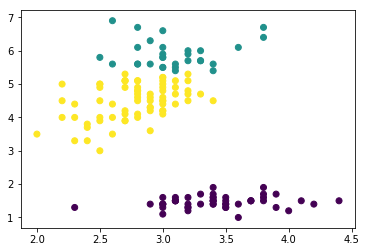

In [34]:
part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()